### 带有权重的图示
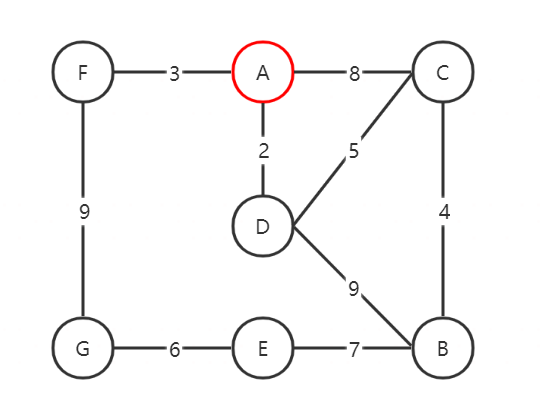


### 单源最短路径规划
固定的单源节点作为起点，规划从起点到其他所有节点的最短路径以及累计权重。

具体思路基本是按照贪心算法来实现(多个局部最优解组合成了全局最优解)。每次规划起点能到达的最近目标(包括直接可达和通过已经规划节点中转可达)作为到达该目标的最优解。最近规划的节点作为中转点，重新规划可以到达的其他未规划节点路径。


### 模拟规划
一开始定义两个集合:  
- `visited = [False] * 7`。表示节点是否已经规划好最短路径。
- `reached = [[weight, paths]] * 7`。表示从起点到达对应节点的路径权重值，具体的路径节点集合。


分步过程:  
1. 从reached中获取能从起点到达的未曾规划过的最近节点。  
2. 标记步骤1获取的节点为已规划好路径节点。  
3. 遍历以步骤1获取节点为起点，可以直接到达的未规划节点。    
    a. 如果经步骤1节点中转后路径更短，更新遍历节点路径为经步骤1中转路径(包括路径权重，路径节点)

图示演示：  
1. 初始化数据。
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | **True** | 0, [] |    
    | 1(B) | False | 0, [] |  
    | 2(C) | False | 8, [0, 2] |  
    | 3(D) | False | 2, [0, 3] |  
    | 4(E) | False | 0, [] |  
    | 5(F) | False | 3, [0, 5] |  
    | 6(G) | False | 0, [] |  

2. 从起点`A`出发可以到达`D,C,F`三个节点，其中最近节点为`D`。同时，经过节点`D`可达节点`C,B`，计算新的最短路径。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | False | ~~0, []~~ **11, [0, 3, 1]** |  
    | 2(C) | False | ~~8, [0, 2]~~ **7, [0, 3, 2]** |  
    | 3(D) | ~~False~~ **True** | 2, [0, 3] |  
    | 4(E) | False | 0, [] |  
    | 5(F) | False | 3, [0, 5] |  
    | 6(G) | False | 0, [] |  

    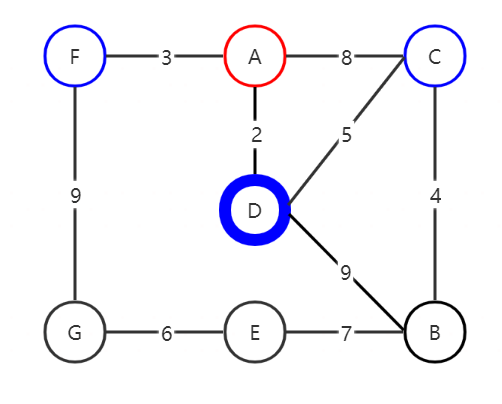

3. 从起点`A`出发可以到达`B,C,F`三个节点，其中最近节点为`F`。同时，经过节点`F`可达节点`G`，计算新的最短路径。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | False | 11, [0, 3, 1] |  
    | 2(C) | False | 7, [0, 3, 2] |  
    | 3(D) | True | 2, [0, 3] |  
    | 4(E) | False | 0, [] |  
    | 5(F) | ~~False~~ **True** | 3, [0, 5] |  
    | 6(G) | False | ~~0, []~~ **12, [0, 5, 6]** |  

    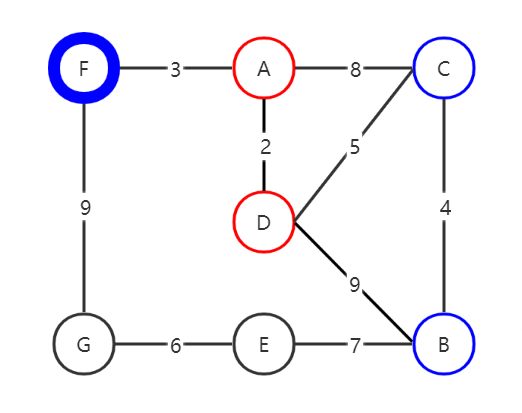


4. 从起点`A`出发可以到达`B,C,G`三个节点，其中最近节点为`C`。同时，经过节点`C`可达节点`B`，计算新的最短路径。新路径距离(12)与现有路径距离(11)比较不是更优解, 不做更新。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | False | 11, [0, 3, 1] |  
    | 2(C) | ~~False~~ **True** | 7, [0, 3, 2] |  
    | 3(D) | True | 2, [0, 3] |  
    | 4(E) | False | 0, [] |  
    | 5(F) | True | 3, [0, 5] |  
    | 6(G) | False | 12, [0, 5, 6] |  

    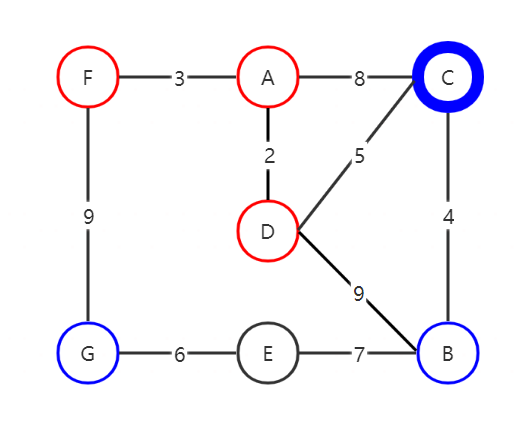


5. 从起点`A`出发可以到达节点`B,G`，其中最近节点为`B`。同时，经过节点`B`可达节点`E`，计算新的最短路径。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | ~~False~~ **True** | 11, [0, 3, 1] |  
    | 2(C) | True | 7, [0, 3, 2] |  
    | 3(D) | True | 2, [0, 3] |  
    | 4(E) | False | ~~0, []~~ **18, [0, 3, 1, 4]** |  
    | 5(F) | True | 3, [0, 5] |  
    | 6(G) | False | 12, [0, 5, 6] |

    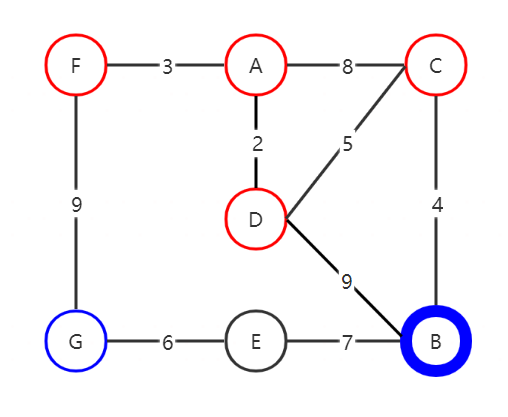


6. 从起点`A`出发可以到达节点`G,E`，其中最近节点为`G`。同时，经过节点`G`可达节点`E`，计算新的最短路径。计算后新的路径与原有路径一致，不做更新。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | True | 11, [0, 3, 1] |  
    | 2(C) | True | 7, [0, 3, 2] |  
    | 3(D) | True | 2, [0, 3] |  
    | 4(E) | False | 18, [0, 3, 1, 4] |  
    | 5(F) | True | 3, [0, 5] |  
    | 6(G) | ~~False~~ **True** | 12, [0, 5, 6] |

    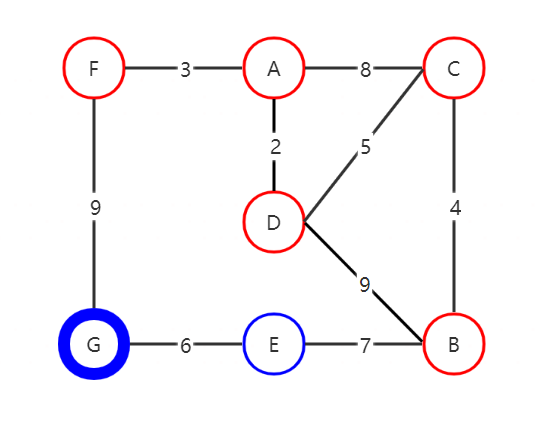



7. 从起点`A`出发可以到达节点`E`，其中最近节点为`E`。由于已经没有其他未规划节点, 整个规划完成。  
    | 节点(i) | visited[i] | reached[i] |  
    | --- | --- | --- |  
    | 0(A) | True | 0, [] |    
    | 1(B) | True | 11, [0, 3, 1] |  
    | 2(C) | True | 7, [0, 3, 2] |  
    | 3(D) | True | 2, [0, 3] |  
    | 4(E) | ~~False~~ **True** | 18, [0, 3, 1, 4] |  
    | 5(F) | True | 3, [0, 5] |  
    | 6(G) | True | 12, [0, 5, 6] |  

    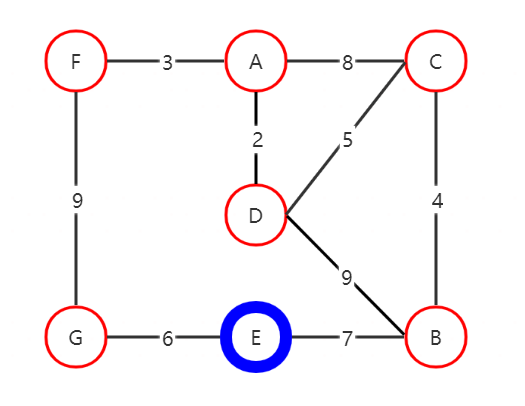

In [33]:
def dijkstra(paths):
    # 是否已经得到从单源路径点开始的最短路径点
    visited = [False] * len(paths)

    # 初始化数据, 处理单源路径开始点
    visited[0] = True
    reached = [[i, v, [0, i] if v > 0 else []] for i,v in enumerate(paths[0])]

    while not all(visited):
        # 获取最小权重路径
        shortest = min(reached, key=lambda x:x[1] if x[1] > 0 and not visited[x[0]] else 99)
        visited[shortest[0]] = True

        # 从新计算从起点开始到各个可达节点(包括从已知中转节点可达)最短距离
        for i,v in enumerate(paths[shortest[0]]):
            if v <= 0:
                continue
            if reached[i][1] < 0 or shortest[1] + v < reached[i][1]:
                reached[i][1] = shortest[1] + v
                reached[i][2] = shortest[2] + [i]

    return reached

def transfer(ans):
    for i,v,p in ans[1:]:
        print('%-10s: %s' % ('-'.join(chr(c + 65) for c in p), v))

transfer(dijkstra([
    [0, -1, 8, 2, -1, 3, -1],
    [-1, 0, 4, 9, 7, -1, -1],
    [8, 4, 0, 5, -1, -1, -1],
    [2, 9, 5, 0, -1, -1, -1],
    [-1, 7, -1, -1, 0, -1, 6],
    [3, -1, -1, -1, -1, 0, 9],
    [-1, -1, -1, -1, 6, 9, 0],
]))


A-D-B     : 11
A-D-C     : 7
A-D       : 2
A-D-B-E   : 18
A-F       : 3
A-F-G     : 12
